In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object Creation

Creating a Series by passing a list of values, letting pandas create a default integer index (for the list)

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing numpy array, with datetime index and labeled columns

In [4]:
dates = pd.date_range('20130101', periods =6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [7]:
df

,A,B,C,D
2013-01-01,0.107978,-0.305659,-0.681187,1.027033
2013-01-02,-0.224894,-1.538465,1.148191,0.280399
2013-01-03,-0.040349,0.138120,-0.605623,-1.406288
2013-01-04,0.588786,-0.229523,-0.520320,-1.533932
2013-01-05,0.185924,2.594881,-0.376013,0.125500
2013-01-06,0.844242,0.433480,-0.635748,-0.351878


Creating a DataFrame by passing a dict

In [8]:
df2 = pd.DataFrame({ 'A' : 1., 
                       'B' : pd.Timestamp('20130102'),
                   'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D' : np.array([3] * 4, dtype='int32'),
                   'E' : pd.Categorical(["test","train","test","train"]),
                   'F' : 'foo'})

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

In [11]:
df.head()  # see the top rows of the frame

,A,B,C,D
2013-01-01,0.107978,-0.305659,-0.681187,1.027033
2013-01-02,-0.224894,-1.538465,1.148191,0.280399
2013-01-03,-0.040349,0.138120,-0.605623,-1.406288
2013-01-04,0.588786,-0.229523,-0.520320,-1.533932
2013-01-05,0.185924,2.594881,-0.376013,0.125500


In [12]:
df.tail(3)  # see the bottom rows of the frame

,A,B,C,D
2013-01-04,0.588786,-0.229523,-0.520320,-1.533932
2013-01-05,0.185924,2.594881,-0.376013,0.125500
2013-01-06,0.844242,0.433480,-0.635748,-0.351878


In [13]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [15]:
df.values

array([[ 0.10797823, -0.30565932, -0.68118703,  1.0270329 ],
       [-0.22489402, -1.53846503,  1.14819124,  0.28039906],
       [-0.04034917,  0.13811957, -0.60562284, -1.40628811],
       [ 0.58878556, -0.22952314, -0.5203201 , -1.53393227],
       [ 0.18592449,  2.59488149, -0.37601275,  0.1255004 ],
       [ 0.84424161,  0.43347965, -0.63574836, -0.35187787]])

In [16]:
df.describe()  # describe shows a quick statistic summary of data

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.243614,0.182139,-0.278450,-0.309861
std,0.400439,1.360465,0.707139,1.002746
min,-0.224894,-1.538465,-0.681187,-1.533932
25%,-0.003267,-0.286625,-0.628217,-1.142686
50%,0.146951,-0.045702,-0.562971,-0.113189
75%,0.488070,0.359640,-0.412090,0.241674
max,0.844242,2.594881,1.148191,1.027033


In [17]:
df.T  # Transposing your data

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.107978,-0.224894,-0.040349,0.588786,0.185924,0.844242
B,-0.305659,-1.538465,0.138120,-0.229523,2.594881,0.433480
C,-0.681187,1.148191,-0.605623,-0.520320,-0.376013,-0.635748
D,1.027033,0.280399,-1.406288,-1.533932,0.125500,-0.351878


In [18]:
df.sort_values(by='B')  # sorting by values

,A,B,C,D
2013-01-02,-0.224894,-1.538465,1.148191,0.280399
2013-01-01,0.107978,-0.305659,-0.681187,1.027033
2013-01-04,0.588786,-0.229523,-0.520320,-1.533932
2013-01-03,-0.040349,0.138120,-0.605623,-1.406288
2013-01-06,0.844242,0.433480,-0.635748,-0.351878
2013-01-05,0.185924,2.594881,-0.376013,0.125500


## Selection

### Getting

In [19]:
df['A']

2013-01-01    0.107978
2013-01-02   -0.224894
2013-01-03   -0.040349
2013-01-04    0.588786
2013-01-05    0.185924
2013-01-06    0.844242
Freq: D, Name: A, dtype: float64

In [20]:
df[0:3]

,A,B,C,D
2013-01-01,0.107978,-0.305659,-0.681187,1.027033
2013-01-02,-0.224894,-1.538465,1.148191,0.280399
2013-01-03,-0.040349,0.138120,-0.605623,-1.406288


In [21]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.224894,-1.538465,1.148191,0.280399
2013-01-03,-0.040349,0.138120,-0.605623,-1.406288
2013-01-04,0.588786,-0.229523,-0.520320,-1.533932


### Selection by Label

for production code, optimized pandas data access methods were recommended: `.at`,`.iat`, `.loc`, `.iloc`, and `.ix`

In [22]:
df.loc[dates[0]]

A    0.107978
B   -0.305659
C   -0.681187
D    1.027033
Name: 2013-01-01 00:00:00, dtype: float64

In [23]:
dates[0]

Timestamp('2013-01-01 00:00:00', offset='D')

** Selecting on a multi-axis by label **

In [24]:
df.loc[:,['A','B']]  # Selecting on a multi-axis by label

,A,B
2013-01-01,0.107978,-0.305659
2013-01-02,-0.224894,-1.538465
2013-01-03,-0.040349,0.138120
2013-01-04,0.588786,-0.229523
2013-01-05,0.185924,2.594881
2013-01-06,0.844242,0.433480


In [25]:
df.loc['20130102':'20130104',['A','B']]  # Showing label slicing, both endpoints are included

,A,B
2013-01-02,-0.224894,-1.538465
2013-01-03,-0.040349,0.138120
2013-01-04,0.588786,-0.229523


In [26]:
df.loc['20130102',['A','B']]  # Reduction in the dimensions of the returned object

A   -0.224894
B   -1.538465
Name: 2013-01-02 00:00:00, dtype: float64

In [27]:
df.loc[dates[0],'A']

0.10797822856980367

** For getting fast access to a scalar (equiv to the prior method) **

In [28]:
df.at[dates[0],'A']

0.10797822856980367

## Selection by Position

`.iloc`

In [29]:
df.iloc[3]

A    0.588786
B   -0.229523
C   -0.520320
D   -1.533932
Name: 2013-01-04 00:00:00, dtype: float64

In [30]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.588786,-0.229523
2013-01-05,0.185924,2.594881


In [31]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.224894,1.148191
2013-01-03,-0.040349,-0.605623
2013-01-05,0.185924,-0.376013


In [32]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.224894,-1.538465,1.148191,0.280399
2013-01-03,-0.040349,0.138120,-0.605623,-1.406288


In [33]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.305659,-0.681187
2013-01-02,-1.538465,1.148191
2013-01-03,0.138120,-0.605623
2013-01-04,-0.229523,-0.520320
2013-01-05,2.594881,-0.376013
2013-01-06,0.433480,-0.635748


In [34]:
df.iloc[1,1]

-1.5384650336709691

For getting fast access to a scalar (equiv to the prior method)

In [35]:
df.iat[1,1]

-1.5384650336709691

## Boolean indexing

In [36]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.107978,-0.305659,-0.681187,1.027033
2013-01-04,0.588786,-0.229523,-0.520320,-1.533932
2013-01-05,0.185924,2.594881,-0.376013,0.125500
2013-01-06,0.844242,0.433480,-0.635748,-0.351878


A `where` operation for getting

In [37]:
df[df>0]

,A,B,C,D
2013-01-01,0.107978,NaN,NaN,1.027033
2013-01-02,NaN,NaN,1.148191,0.280399
2013-01-03,NaN,0.138120,NaN,NaN
2013-01-04,0.588786,NaN,NaN,NaN
2013-01-05,0.185924,2.594881,NaN,0.125500
2013-01-06,0.844242,0.433480,NaN,NaN


Using the `isin()` method for filtering:

In [38]:
df2 = df.copy()

In [39]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [40]:
df2

,A,B,C,D,E
2013-01-01,0.107978,-0.305659,-0.681187,1.027033,one
2013-01-02,-0.224894,-1.538465,1.148191,0.280399,one
2013-01-03,-0.040349,0.138120,-0.605623,-1.406288,two
2013-01-04,0.588786,-0.229523,-0.520320,-1.533932,three
2013-01-05,0.185924,2.594881,-0.376013,0.125500,four
2013-01-06,0.844242,0.433480,-0.635748,-0.351878,three


In [41]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.040349,0.138120,-0.605623,-1.406288,two
2013-01-05,0.185924,2.594881,-0.376013,0.125500,four


## Setting

In [42]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [43]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [44]:
df['F'] = s1

In [45]:
df.at[dates[0],'A'] = 0

In [46]:
df.iat[0,1]=0

In [47]:
df.loc[:,'D'] = np.array([5] * len(df))

In [48]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.681187,5,NaN
2013-01-02,-0.224894,-1.538465,1.148191,5,1.0
2013-01-03,-0.040349,0.138120,-0.605623,5,2.0
2013-01-04,0.588786,-0.229523,-0.520320,5,3.0
2013-01-05,0.185924,2.594881,-0.376013,5,4.0
2013-01-06,0.844242,0.433480,-0.635748,5,5.0


A `where` operation with setting

In [49]:
df2 = df.copy()

In [50]:
df2[df2 > 0] = -df2

In [51]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.681187,-5,NaN
2013-01-02,-0.224894,-1.538465,-1.148191,-5,-1.0
2013-01-03,-0.040349,-0.138120,-0.605623,-5,-2.0
2013-01-04,-0.588786,-0.229523,-0.520320,-5,-3.0
2013-01-05,-0.185924,-2.594881,-0.376013,-5,-4.0
2013-01-06,-0.844242,-0.433480,-0.635748,-5,-5.0


## Missing Data

pandas primarily uses the value `np.nan` to represent missing data.  It's by default not included in computations.  

Reindexing allows you to change/add/delete index on a specified axis.  This returns a copy of the data.

In [52]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [53]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [54]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.681187,5,NaN,1.0
2013-01-02,-0.224894,-1.538465,1.148191,5,1.0,1.0
2013-01-03,-0.040349,0.138120,-0.605623,5,2.0,NaN
2013-01-04,0.588786,-0.229523,-0.520320,5,3.0,NaN


*To drop any rows that have missing data.*  

In [55]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.224894,-1.538465,1.148191,5,1.0,1.0


*Filling missing data*

In [56]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.681187,5,5.0,1.0
2013-01-02,-0.224894,-1.538465,1.148191,5,1.0,1.0
2013-01-03,-0.040349,0.138120,-0.605623,5,2.0,5.0
2013-01-04,0.588786,-0.229523,-0.520320,5,3.0,5.0


To get the boolean mask where values are `nan`

In [57]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

### Stats

Operations in general *exclude* missing data.

In [58]:
df.mean()

A    0.225618
B    0.233082
C   -0.278450
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [59]:
df.mean(1)

2013-01-01    1.079703
2013-01-02    1.076966
2013-01-03    1.298430
2013-01-04    1.567788
2013-01-05    2.280959
2013-01-06    2.128395
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment.  In addition, pandas automatically broadcasts along the specified dimension.  

In [60]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [61]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [62]:
df.sub(s,axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.040349,-0.861880,-1.605623,4.0,1.0
2013-01-04,-2.411214,-3.229523,-3.520320,2.0,0.0
2013-01-05,-4.814076,-2.405119,-5.376013,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [63]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.681187,5,NaN
2013-01-02,-0.224894,-1.538465,1.148191,5,1.0
2013-01-03,-0.040349,0.138120,-0.605623,5,2.0
2013-01-04,0.588786,-0.229523,-0.520320,5,3.0
2013-01-05,0.185924,2.594881,-0.376013,5,4.0
2013-01-06,0.844242,0.433480,-0.635748,5,5.0


## Apply

Applying functions to the data

In [64]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.681187,5,NaN
2013-01-02,-0.224894,-1.538465,0.467004,10,1.0
2013-01-03,-0.265243,-1.400345,-0.138619,15,3.0
2013-01-04,0.323542,-1.629869,-0.658939,20,6.0
2013-01-05,0.509467,0.965013,-1.034951,25,10.0
2013-01-06,1.353708,1.398493,-1.670700,30,15.0


In [65]:
df.apply(lambda x: x.max() - x.min())

A    1.069136
B    4.133347
C    1.829378
D    0.000000
F    4.000000
dtype: float64

## Histogramming

In [66]:
s = pd.Series(np.random.randint(0,7, size=10))

In [67]:
s

0    1
1    2
2    4
3    4
4    4
5    1
6    4
7    5
8    0
9    1
dtype: int64

In [68]:
s.value_counts()

4    4
1    3
5    1
2    1
0    1
dtype: int64

## String Methods

In [69]:
s = pd.Series(['A','B','C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [70]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations

Concatenating pandas objects together with `concat()`:

In [71]:
df = pd.DataFrame( np.random.randn(10,4))

In [72]:
df

,0,1,2,3
0,0.711814,0.286101,-0.964718,0.783251
1,-0.314288,-1.239076,0.263363,0.589101
2,0.835378,-0.473338,2.178842,1.238468
3,0.454717,0.483830,-1.122314,-1.440798
4,1.607458,-0.348294,-1.494330,-0.081320
5,-0.766084,0.734255,1.225657,1.382531
6,-1.071725,-0.663003,-0.321134,-1.649526
7,0.133685,-0.181229,0.390131,1.871952
8,-1.607369,0.241126,-0.110803,0.320145
9,-1.457832,-2.143019,0.327878,-1.129839


In [73]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [74]:
pd.concat(pieces)

,0,1,2,3
0,0.711814,0.286101,-0.964718,0.783251
1,-0.314288,-1.239076,0.263363,0.589101
2,0.835378,-0.473338,2.178842,1.238468
3,0.454717,0.483830,-1.122314,-1.440798
4,1.607458,-0.348294,-1.494330,-0.081320
5,-0.766084,0.734255,1.225657,1.382531
6,-1.071725,-0.663003,-0.321134,-1.649526
7,0.133685,-0.181229,0.390131,1.871952
8,-1.607369,0.241126,-0.110803,0.320145
9,-1.457832,-2.143019,0.327878,-1.129839


### Join

In [75]:
left  = pd.DataFrame({'key': ['foo','foo'], 'lval': [1,2]})

In [79]:
right = pd.DataFrame({'key': ['foo','foo'], 'rval': [4,5]})

In [77]:
left

,key,lval
0,foo,1
1,foo,2


In [80]:
right

,key,rval
0,foo,4
1,foo,5


In [81]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [82]:
left  = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1,2]})

In [83]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4,5]})

In [84]:
left

,key,lval
0,foo,1
1,bar,2


In [85]:
right

,key,rval
0,foo,4
1,bar,5


In [86]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append

In [87]:
df = pd.DataFrame(np.random.randn(8,4), columns=['A','B','C','D'])

In [88]:
df

,A,B,C,D
0,2.534777,-0.289296,0.356404,-0.025108
1,-1.105884,1.114242,-0.206507,-0.521112
2,-0.434325,-0.396506,-0.762657,-0.146347
3,0.506812,0.676005,0.939436,-1.524064
4,0.317750,-0.083033,-1.111153,1.189702
5,0.095024,0.021715,1.384186,1.276461
6,-0.066084,-0.523915,0.320799,0.410338
7,1.240078,-1.330350,-0.905604,-0.106239


In [89]:
s = df.iloc[3]

In [90]:
df.append(s,ignore_index=True)

,A,B,C,D
0,2.534777,-0.289296,0.356404,-0.025108
1,-1.105884,1.114242,-0.206507,-0.521112
2,-0.434325,-0.396506,-0.762657,-0.146347
3,0.506812,0.676005,0.939436,-1.524064
4,0.317750,-0.083033,-1.111153,1.189702
5,0.095024,0.021715,1.384186,1.276461
6,-0.066084,-0.523915,0.320799,0.410338
7,1.240078,-1.330350,-0.905604,-0.106239
8,0.506812,0.676005,0.939436,-1.524064


## Grouping

By "group by" we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

In [91]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 
                            'foo', 'bar', 'foo', 'foo'],
                  'B' : ['one', 'one', 'two', 'three',
                        'two', 'two', 'one', 'three'],
                  'C' : np.random.randn(8), 
                  'D' : np.random.randn(8)})

In [92]:
df

,A,B,C,D
0,foo,one,-0.626878,-0.624873
1,bar,one,2.184180,1.105793
2,foo,two,-1.312085,1.740399
3,bar,three,-0.157784,0.770271
4,foo,two,1.944903,-0.812146
5,bar,two,0.794762,0.088218
6,foo,one,-2.824335,1.461683
7,foo,three,-0.959642,0.202795


Grouping and then applying a function *sum* to the resulting groups

In [93]:
df.groupby('A').sum()

,C,D
A,,
bar,2.821158,1.964281
foo,-3.778037,1.967857


Grouping by multiple colums forms a hierarchical index, which we then apply the function

In [94]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    2.184180  1.105793
    three -0.157784  0.770271
    two    0.794762  0.088218
foo one   -3.451214  0.836810
    three -0.959642  0.202795
    two    0.632819  0.928253

## Reshaping

### Stack

In [95]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 
                    'foo', 'foo', 'qux', 'qux'],
                   ['one','two', 'one', 'two', 
                   'one', 'two','one', 'two']]))

In [96]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [97]:
index = pd.MultiIndex.from_tuples(tuples, names=['first','second'])

In [99]:
df = pd.DataFrame(np.random.randn(8,2),index=index,columns=['A','B'])

In [100]:
df

A         B
first second                    
bar   one    -1.031564  0.932540
      two    -0.445919 -1.471211
baz   one     1.008876 -0.456601
      two    -0.108111  0.050855
foo   one     0.929118  0.381359
      two    -0.846887 -1.360578
qux   one     1.752230 -0.491567
      two    -0.673097 -0.205947

In [102]:
df2 =df[:4]
df[:4]

A         B
first second                    
bar   one    -1.031564  0.932540
      two    -0.445919 -1.471211
baz   one     1.008876 -0.456601
      two    -0.108111  0.050855

The `stack()` method "compresses" a level in the DataFrame's columns

In [103]:
stacked = df2.stack()

In [104]:
stacked

first  second   
bar    one     A   -1.031564
               B    0.932540
       two     A   -0.445919
               B   -1.471211
baz    one     A    1.008876
               B   -0.456601
       two     A   -0.108111
               B    0.050855
dtype: float64

In [105]:
stacked.unstack()

A         B
first second                    
bar   one    -1.031564  0.932540
      two    -0.445919 -1.471211
baz   one     1.008876 -0.456601
      two    -0.108111  0.050855

In [106]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.031564 -0.445919
      B  0.932540 -1.471211
baz   A  1.008876 -0.108111
      B -0.456601  0.050855

In [107]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.031564  1.008876
       B  0.932540 -0.456601
two    A -0.445919 -0.108111
       B -1.471211  0.050855

## Pivot Tables

In [108]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3, 
                  'B' : ['A', 'B', 'C'] * 4 , 
                  'C' : ['foo', 'foo', 'foo', 'bar', 'bar' , 'bar'] * 2,
                  'D' : np.random.randn(12),
                  'E' : np.random.randn(12)})

In [109]:
df

,A,B,C,D,E
0,one,A,foo,-1.117575,1.078278
1,one,B,foo,0.523796,-0.145555
2,two,C,foo,1.104775,-0.488835
3,three,A,bar,-2.550877,-1.371550
4,one,B,bar,0.205619,1.332542
5,one,C,bar,-0.541524,0.997665
6,two,A,foo,-0.239816,0.007408
7,three,B,foo,-1.598606,0.716422
8,one,C,foo,-0.754653,1.173907
9,one,A,bar,0.295430,0.036910


In [110]:
pd.pivot_table(df, values='D',index=['A','B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.295430 -1.117575
      B  0.205619  0.523796
      C -0.541524 -0.754653
three A -2.550877       NaN
      B       NaN -1.598606
      C  0.992117       NaN
two   A       NaN -0.239816
      B  0.200459       NaN
      C       NaN  1.104775

## Time Series

In [111]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [112]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [113]:
ts.resample('5Min').sum()

2012-01-01    24449
Freq: 5T, dtype: int64

In [114]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [115]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [116]:
ts

2012-03-06   -1.181138
2012-03-07    0.534697
2012-03-08    0.180967
2012-03-09   -1.768754
2012-03-10    0.923733
Freq: D, dtype: float64

In [117]:
ts_utc = ts.tz_localize('UTC')

In [118]:
ts_utc

2012-03-06 00:00:00+00:00   -1.181138
2012-03-07 00:00:00+00:00    0.534697
2012-03-08 00:00:00+00:00    0.180967
2012-03-09 00:00:00+00:00   -1.768754
2012-03-10 00:00:00+00:00    0.923733
Freq: D, dtype: float64

In [119]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.181138
2012-03-06 19:00:00-05:00    0.534697
2012-03-07 19:00:00-05:00    0.180967
2012-03-08 19:00:00-05:00   -1.768754
2012-03-09 19:00:00-05:00    0.923733
Freq: D, dtype: float64

In [120]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [121]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [122]:
ts

2012-01-31   -1.692805
2012-02-29    0.813016
2012-03-31   -0.570469
2012-04-30    0.435280
2012-05-31    1.052235
Freq: M, dtype: float64

In [123]:
ps = ts.to_period()

In [124]:
ps

2012-01   -1.692805
2012-02    0.813016
2012-03   -0.570469
2012-04    0.435280
2012-05    1.052235
Freq: M, dtype: float64

In [125]:
ps.to_timestamp()

2012-01-01   -1.692805
2012-02-01    0.813016
2012-03-01   -0.570469
2012-04-01    0.435280
2012-05-01    1.052235
Freq: MS, dtype: float64

In [127]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [128]:
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='int64', freq='Q-NOV')

In [130]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [131]:
ts

1990Q1    0.196041
1990Q2   -0.894318
1990Q3   -1.193014
1990Q4   -0.220753
1991Q1   -0.592566
1991Q2    0.664479
1991Q3    4.295116
1991Q4   -0.041845
1992Q1    1.353345
1992Q2    0.989477
1992Q3    0.001025
1992Q4    0.180207
1993Q1    1.911898
1993Q2    0.806512
1993Q3    0.315644
1993Q4    1.576483
1994Q1   -0.732719
1994Q2    0.356894
1994Q3    1.443373
1994Q4   -1.157502
1995Q1   -1.341708
1995Q2    0.067637
1995Q3    0.809315
1995Q4   -0.356393
1996Q1    0.447455
1996Q2    0.005381
1996Q3    1.366337
1996Q4   -0.447707
1997Q1   -0.254580
1997Q2   -0.626916
1997Q3    1.204768
1997Q4    0.348730
1998Q1   -0.495597
1998Q2    0.479936
1998Q3    0.346160
1998Q4    0.502327
1999Q1    0.633320
1999Q2    0.566322
1999Q3   -0.140410
1999Q4    1.556774
2000Q1   -1.212577
2000Q2   -0.858251
2000Q3    1.490956
2000Q4   -1.099825
Freq: Q-NOV, dtype: float64

In [132]:
ts.index = (prng.asfreq('M', 'e')+1).asfreq('M','s') + 9

In [133]:
ts.head()

1990-12    0.196041
1991-03   -0.894318
1991-06   -1.193014
1991-09   -0.220753
1991-12   -0.592566
Freq: M, dtype: float64

## Categoricals

In [134]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a','b','b','a','a','e']})

Convert the raw grades to a categorical data type.

In [135]:
df["grade"] = df["raw_grade"].astype("category")

In [136]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to `Series.cat.categories` is inplace!)

In [137]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [138]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Sorting is per order in the categories, not lexical order

In [139]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good" ])

In [140]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [141]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [142]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

In [143]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [144]:
ts = ts.cumsum()

In [145]:
ts.plot()

**The following command is important to view matplotlib plots on a jupyter notebook**

In [147]:
%matplotlib inline 

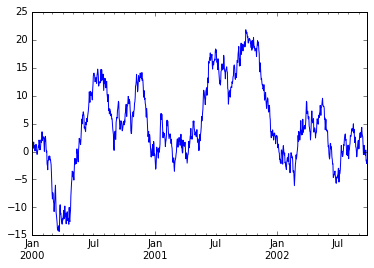

In [148]:
ts.plot()

In [149]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=['A','B','C','D'])

In [150]:
df = df.cumsum()

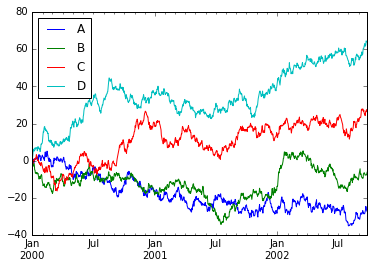

In [151]:
plt.figure(); df.plot(); plt.legend(loc='best')

# Getting Data In/Out

## CSV

[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [152]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [153]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.832018,-0.662599,-1.283141,1.015235
1,2000-01-02,-0.894730,-0.758248,-1.316575,2.177614
2,2000-01-03,-0.693075,-2.977505,-1.533427,4.183044
3,2000-01-04,0.874141,-2.278339,0.229984,6.254534
4,2000-01-05,-1.495982,-1.338677,-0.123458,5.829667
5,2000-01-06,-0.812750,-1.447970,-0.345897,5.273785
6,2000-01-07,0.461737,-2.194869,1.117848,5.262458
7,2000-01-08,0.812821,-4.909496,1.171028,5.538184
8,2000-01-09,0.555211,-5.017059,0.731850,6.944417
9,2000-01-10,1.209316,-6.625535,0.859823,6.357204


## HDF5

Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [154]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [155]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,0.832018,-0.662599,-1.283141,1.015235
2000-01-02,-0.894730,-0.758248,-1.316575,2.177614
2000-01-03,-0.693075,-2.977505,-1.533427,4.183044
2000-01-04,0.874141,-2.278339,0.229984,6.254534
2000-01-05,-1.495982,-1.338677,-0.123458,5.829667
2000-01-06,-0.812750,-1.447970,-0.345897,5.273785
2000-01-07,0.461737,-2.194869,1.117848,5.262458
2000-01-08,0.812821,-4.909496,1.171028,5.538184
2000-01-09,0.555211,-5.017059,0.731850,6.944417
2000-01-10,1.209316,-6.625535,0.859823,6.357204


## Excel 

In [156]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [157]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,0.832018,-0.662599,-1.283141,1.015235
2000-01-02,-0.894730,-0.758248,-1.316575,2.177614
2000-01-03,-0.693075,-2.977505,-1.533427,4.183044
2000-01-04,0.874141,-2.278339,0.229984,6.254534
2000-01-05,-1.495982,-1.338677,-0.123458,5.829667
2000-01-06,-0.812750,-1.447970,-0.345897,5.273785
2000-01-07,0.461737,-2.194869,1.117848,5.262458
2000-01-08,0.812821,-4.909496,1.171028,5.538184
2000-01-09,0.555211,-5.017059,0.731850,6.944417
2000-01-10,1.209316,-6.625535,0.859823,6.357204


## Gotchas

If you are trying an operation and you see an exception like:

In [158]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.  